# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

# Preparing data

In [3]:
data = '../input/minerals-identification-classification/Minet 5640 Images/'

In [4]:
for folder in  os.listdir(data): 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 1155 in folder quartz
For data , found 975 in folder malachite
For data , found 0 in folder Minerals_5640.csv
For data , found 525 in folder chrysocolla
For data , found 1057 in folder pyrite
For data , found 335 in folder muscovite
For data , found 1025 in folder biotite
For data , found 410 in folder bornite


In [5]:
code = {'biotite':0 ,'bornite':1 ,'chrysocolla':2,'malachite':3, 'muscovite':4, 'pyrite':5, 'quartz':6}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
size = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0         (542, 578, 3)
1         (640, 640, 3)
2       (1024, 1024, 3)
3         (384, 400, 3)
4       (1000, 1000, 3)
             ...       
5477      (400, 400, 3)
5478      (454, 500, 3)
5479      (230, 300, 3)
5480     (300, 1300, 3)
5481      (286, 560, 3)
Length: 5482, dtype: object>

In [7]:
s = 100

In [8]:
X_Images = []
y_Types = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [9]:
print(f'we have {len(X_Images)} items in X_Images')

we have 5482 items in X_Images


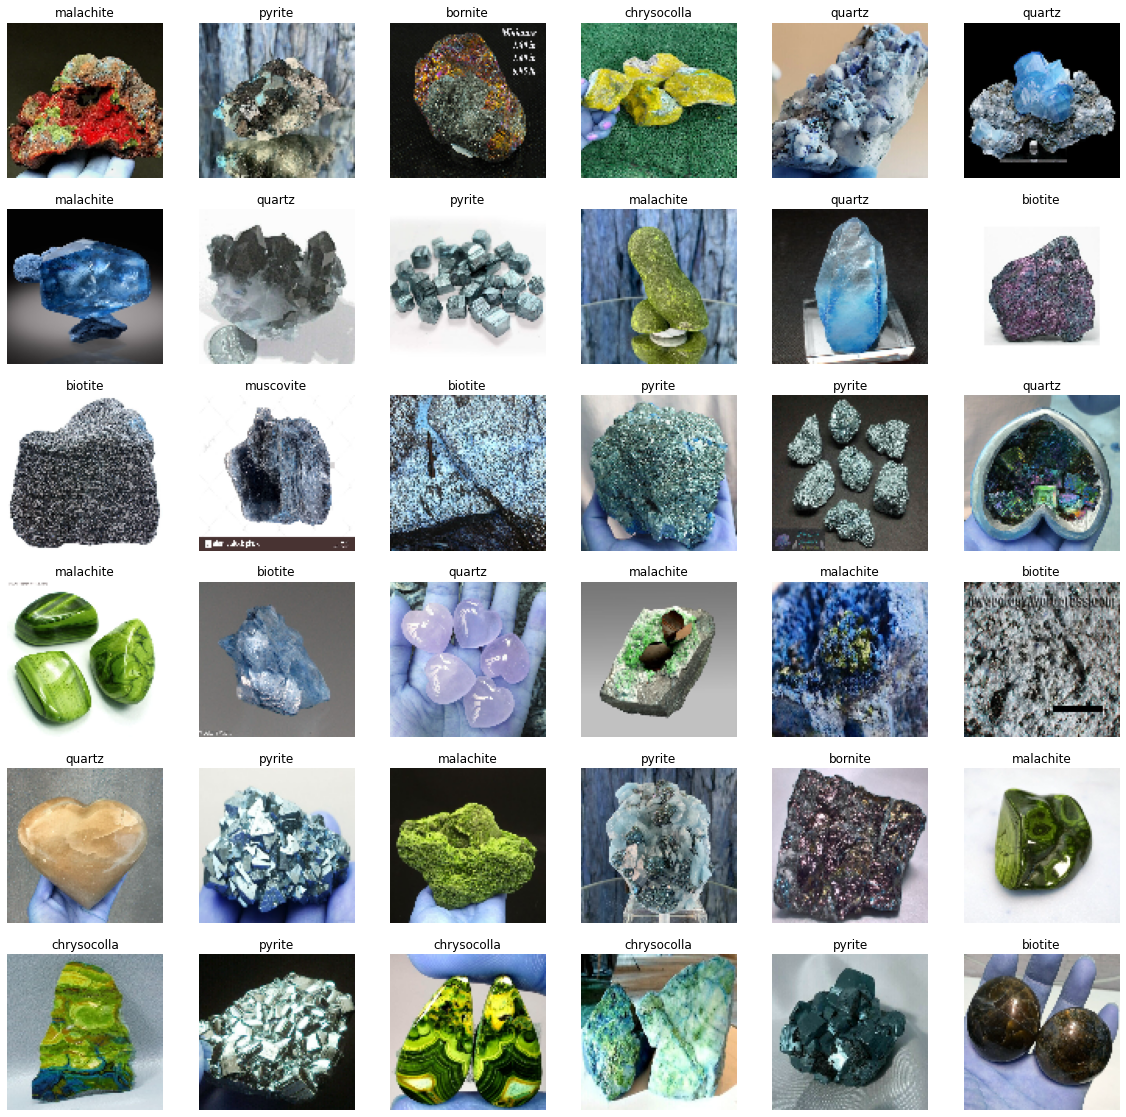

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

# Spliting data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_Images, y_Types, train_size=0.7, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

'''print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')'''

"print(f'X_train shape  is {X_train.shape}')\nprint(f'X_test shape  is {X_test.shape}')\nprint(f'X_pred shape  is {X_pred_array.shape}')\nprint(f'y_train shape  is {y_train.shape}')\nprint(f'y_test shape  is {y_test.shape}')"

# Making and Training model

In [12]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.001) ,            
        keras.layers.Dense(7,activation='softmax') ,    
        ])

2022-05-21 11:36:15.948856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 11:36:16.079639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 11:36:16.080488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 11:36:16.081994: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [15]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1)

2022-05-21 11:36:19.450828: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-21 11:36:20.866590: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


120/120 [==============================] - 16s 62ms/step - loss: 2.1246 - accuracy: 0.2974
Epoch 2/50
120/120 [==============================] - 6s 53ms/step - loss: 1.4478 - accuracy: 0.4404
Epoch 3/50
120/120 [==============================] - 6s 52ms/step - loss: 1.2636 - accuracy: 0.5431
Epoch 4/50
120/120 [==============================] - 6s 53ms/step - loss: 1.1055 - accuracy: 0.6028
Epoch 5/50
120/120 [==============================] - 6s 53ms/step - loss: 0.9861 - accuracy: 0.6628
Epoch 6/50
120/120 [==============================] - 6s 53ms/step - loss: 0.8404 - accuracy: 0.7021
Epoch 7/50
120/120 [==============================] - 6s 53ms/step - loss: 0.7172 - accuracy: 0.7709
Epoch 8/50
120/120 [==============================] - 6s 53ms/step - loss: 0.6929 - accuracy: 0.7699
Epoch 9/50
120/120 [==============================] - 6s 53ms/step - loss: 0.5800 - accuracy: 0.8056
Epoch 10/50
120/120 [==============================] - 6s 53ms/step - loss: 0.4443 - accuracy: 0.8619

# Accuracy of model

In [16]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

52/52 [==============================] - 1s 22ms/step - loss: 1.3644 - accuracy: 0.8347
Test Loss is 1.3644074201583862
Test Accuracy is 0.834650456905365


# Predicting data

In [17]:
y_pred = KerasModel.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (1645, 7)


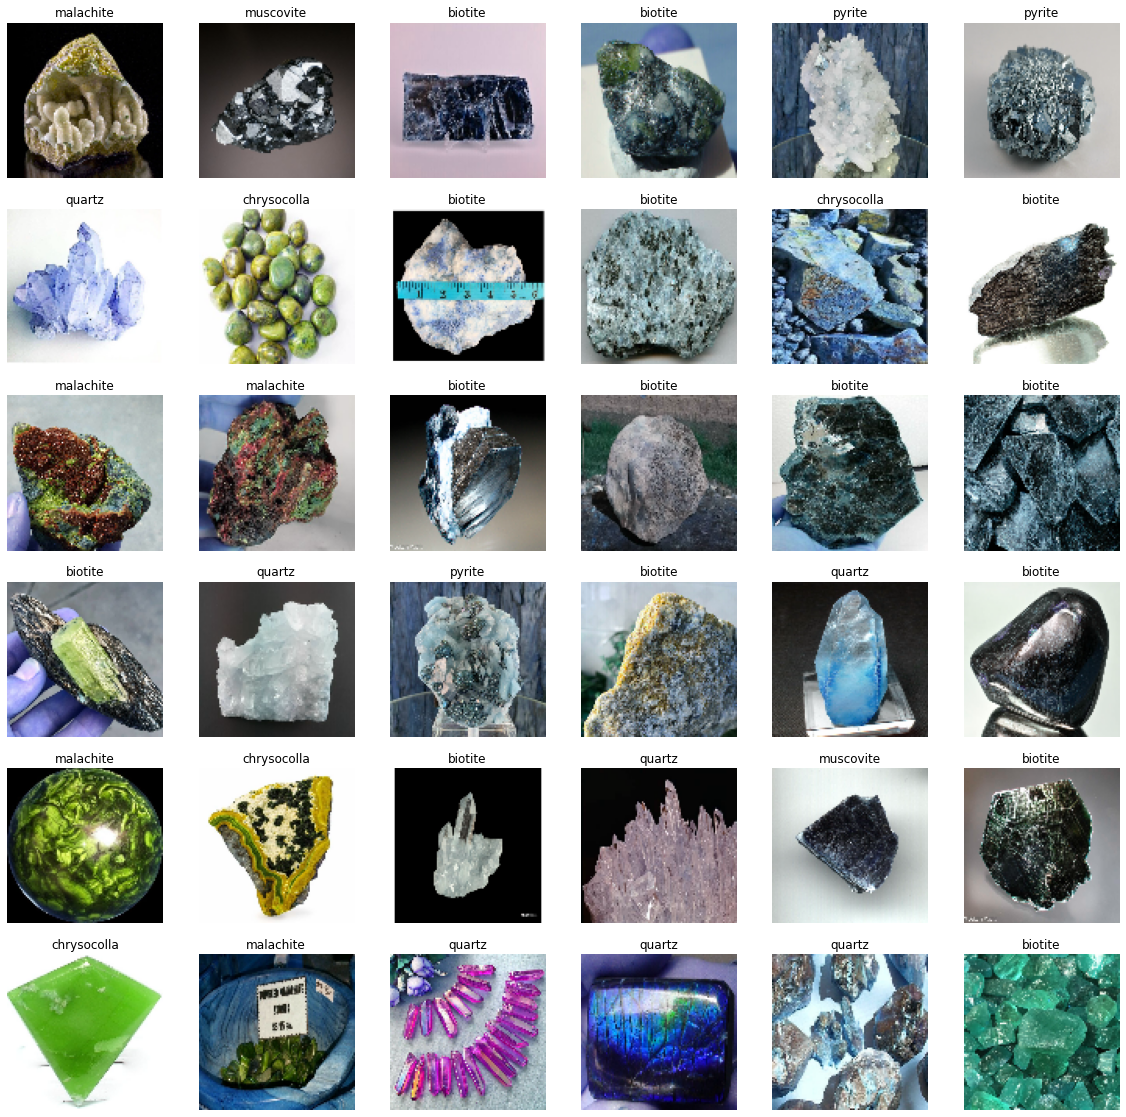

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))